# ***Name : Muhammad Talha***
# ***Reg No : 23jzele0543***
# ***Section : B*** 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
print("labrary installed")

labrary installed


In [38]:
import os
os.chdir(r'E:\archive(0)')

In [39]:
pd= pd.read_csv(r'E:\\archive(0)\kc_house_data.csv')

In [40]:
pd.head(5).T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [41]:
pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [42]:
pd.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [51]:
class Housepricepredictor:
    def __init__(self, data):
        self.data =data 
    def preprocess_data(self):
        self.data=self.data.dropna()
        return self.data
    def split_data(self, features, target):
        x= self.data[features]
        y= self.data[target]
        return train_test_split(x,y, test_size=0.2,random_state=42)

In [52]:
features=['sqft_living', 'bedrooms', 'bathrooms']
target='price'

In [53]:
predictor = Housepricepredictor(pd)
pd_cleaned = predictor.preprocess_data()
X_train, X_test, y_train, y_test = predictor.split_data(features,target)


In [54]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [55]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 74237634953.18321


In [56]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Regressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

# Evaluate Decision Tree Regressor
tree_mse = mean_squared_error(y_test, tree_pred)
print(f'Decision Tree Mean Squared Error: {tree_mse}')


Decision Tree Mean Squared Error: 117608164722.68994


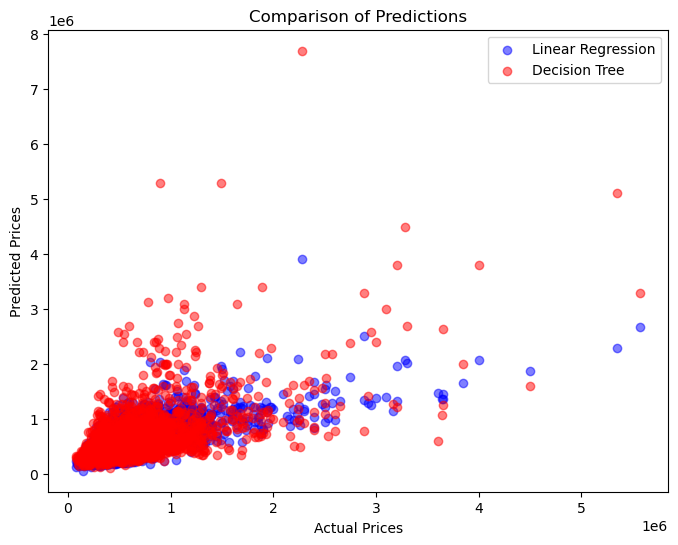

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Linear Regression")
plt.scatter(y_test, tree_pred, alpha=0.5, color="red", label="Decision Tree")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.title("Comparison of Predictions")
plt.show()
